## Центральная предельная теорема своими руками

В этом задании нам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Я выбрал в качетсве непрерывного распределения -  Бета-распределение

Подобнее тут: https://ru.wikipedia.org/wiki/Бета-распределение

У нее есть два параметра: альфа и бета

Математическое ожидание и дисперсия случайной величины X имеющей бета-распределение, имеют вид:

$$E(x)=\frac{\alpha}{\alpha + \beta}$$

$$D(x)=\frac{\alpha*\beta}{\Bigl(\alpha+\beta\Bigr)^2*(\alpha+\beta+1)}$$

### Imports

In [1]:
from typing import List

import matplotlib.pyplot as plt
from scipy.stats import beta, norm
import numpy as np

### Global values

In [2]:
# параметр альфа бета-распределения
a = 5
# параметр бета бета-распределения
b = 1
# объем одной выборки
scale = 1000

In [3]:
def beta_distribution(a:int, b:int, scale:int) -> List[int]:
    """
    params: 
    a: параметр альфа бета-распределения
    b: параметр бета бета-распределения
    scale: объем выборки
    
    return:
    x, y: область определения и область значений
    """
    x = np.arange (0, 1, 1 / scale)
    y = np.random.beta(a, b, scale)

    return x, y

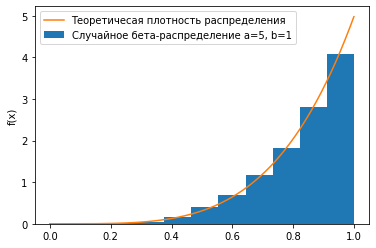

In [4]:
x, y = beta_distribution(a=a, b=b, scale=scale)

fig, ax = plt.subplots()
ax.hist(y, bins=10, density=True, label=f'Случайное бета-распределение a={a}, b={b}')
ax.plot(x, beta.pdf(x, a, b), label='Теоретичесая плотность распределения')
ax.set_ylabel('f(x)')
ax.legend()
plt.show()

Видно, что теоретическая плотность распределения и гистограмма синтезированной выборки похожи друг на друга

In [5]:
def selections_by_size(a=5, b=1, n=10, amount=100000):
    # Генерируем выборку размера amount из средних выборочных бета-распределения объема n 
    t = [np.sum(np.random.beta(a, b, n)) / n for _ in range(amount)]

    # Поставляем в формулу мат-ожидания и дисперсии
    ex_teor = a / (a + b)
    dx_teor = a * b / (a + b) ** 2 / (a + b + 1)

    # Выводим графики
    fig, ax = plt.subplots()
    ax.hist(t, bins=20, density=True, label='Гистограмма распределения средних выборочных')
    ax.plot(x, norm.pdf(x, ex_teor, dx_teor), label='Теоретическая плотность распределений')
    ax.set_ylabel('f(x)')
    ax.legend(loc=2)
    plt.show()

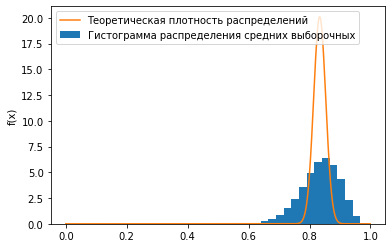

In [6]:
# Для объема выборки 5
selections_by_size(a=a, b=b, n=5)

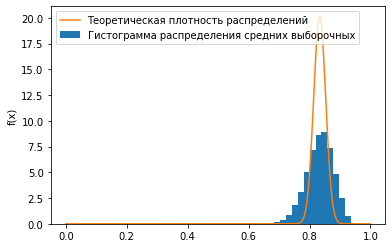

In [7]:
# Для объема выборки 10
selections_by_size(a=a, b=b, n=10)

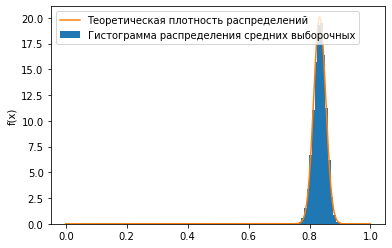

In [8]:
# Для объема выборки 50
selections_by_size(a=a, b=b, n=50)

Как видно на графиках, гистограмма распределения средних выборочных приближается к теоретической плотности нормального распределения по мере увеличения размера выборки, поэтому можно считать центральная предельной теорема работает для бета-распределения